In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns;sns.set()
from sklearn.cross_validation import train_test_split

C:\Users\csim\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
sun = pd.read_csv("sun_data_0626.csv")
no_sun = pd.read_csv("no_sun_data_0626.csv")
sun= sun[(sun["CASE_NO"] != 616411) | (sun["day"] != "2018-03-18")]
sun= sun[(sun["CASE_NO"] != 710511) | (sun["day"] != "2018-03-18")]

col_names = ['CASE_NO', 'DATA_TIME_datetype', 'day', 'time', 'dmy_x','final_sun', 
             'tem_3hr_mean', 'T', 'RH', 'WS', 'PoP6h']

In [4]:
data_total = pd.concat([sun,no_sun],axis=0)
data_total = data_total.reset_index(drop=True)
total_x = data_total[col_names]
total_y = data_total['dmy_y']

total_train_x , total_test_x , total_train_y , total_test_y = train_test_split(total_x,total_y,random_state=17,train_size=0.7)

total_train_x_1 = total_train_x[[ 'dmy_x','final_sun', 'tem_3hr_mean', 'T', 'RH']]
total_test_x_1 = total_test_x[[ 'dmy_x','final_sun', 'tem_3hr_mean', 'T', 'RH']]

total_train_x_1 = (total_train_x_1-total_train_x_1.mean(axis=0))/total_train_x_1.std(axis=0)
total_test_x_1 = (total_test_x_1-total_test_x_1.mean(axis=0))/total_test_x_1.std(axis=0)

total_train_df = pd.DataFrame(total_train_x,columns=col_names)
total_train_df = pd.concat([total_train_df,total_train_y],axis=1)

total_test_df = pd.DataFrame(total_test_x,columns=col_names)
total_test_df = pd.concat([total_test_df,total_test_y],axis=1)

In [6]:
sun_x = sun[col_names]
sun_y = sun['dmy_y']
no_sun_x = no_sun[col_names]
no_sun_y = no_sun['dmy_y']

sun_train_x , sun_test_x , sun_train_y , sun_test_y = train_test_split(sun_x,sun_y,random_state=17,train_size=0.7)
no_sun_train_x , no_sun_test_x , no_sun_train_y , no_sun_test_y = train_test_split(no_sun_x,no_sun_y,random_state=17,train_size=0.7)

sun_train_x_1 = sun_train_x[[ 'dmy_x','final_sun', 'tem_3hr_mean', 'T', 'RH',]]
no_sun_train_x_1 = no_sun_train_x[[ 'dmy_x','final_sun', 'tem_3hr_mean', 'T', 'RH']]

sun_test_x_1 = sun_test_x[[ 'dmy_x','final_sun', 'tem_3hr_mean', 'T', 'RH']]
no_sun_test_x_1 = no_sun_test_x[[ 'dmy_x','final_sun', 'tem_3hr_mean', 'T', 'RH']]

sun_train_x_1 = (sun_train_x_1-sun_train_x_1.mean(axis=0))/sun_train_x_1.std(axis=0)
no_sun_train_x_1 = (no_sun_train_x_1-no_sun_train_x_1.mean(axis=0))/no_sun_train_x_1.std(axis=0)
sun_test_x_1 = (sun_test_x_1-sun_test_x_1.mean(axis=0))/sun_test_x_1.std(axis=0)
no_sun_test_x_1 = (no_sun_test_x_1-no_sun_test_x_1.mean(axis=0))/no_sun_test_x_1.std(axis=0)

sun_train_df = pd.DataFrame(sun_train_x,columns=col_names)
sun_train_df = pd.concat([sun_train_df,sun_train_y],axis=1)
no_sun_train_df = pd.DataFrame(no_sun_train_x,columns=col_names)
no_sun_train_df = pd.concat([no_sun_train_df,no_sun_train_y],axis=1)

sun_test_df = pd.DataFrame(sun_test_x,columns=col_names)
sun_test_df = pd.concat([sun_test_df,sun_test_y],axis=1)
no_sun_test_df = pd.DataFrame(no_sun_test_x,columns=col_names)
no_sun_test_df = pd.concat([no_sun_test_df,no_sun_test_y],axis=1)

In [8]:
def predict_df(df,x_1,model):
    df["pre_y"] = model.predict(x_1)
    df = df.reset_index(drop=True)
    
    indexed1 = df.set_index('DATA_TIME_datetype')  
    return indexed1[["dmy_y","pre_y"]].plot()


In [11]:
def MAPE(data):
    mape = np.mean(abs((data["dmy_y"] - data["pre_y"]))/data["dmy_y"])
    return mape
def MSE(data):
    mse = np.mean((data["pre_y"] -data["dmy_y"]) ** 2)
    return mse                                      

In [7]:
from sklearn.linear_model import LinearRegression
lm_sun = LinearRegression(fit_intercept= True)
lm_sun.fit(sun_train_x_1,sun_train_y)

#
params_sun = pd.Series(lm_sun.coef_,index=sun_train_x_1.columns)
lm_sun.intercept_

sun_train_s = lm_sun.score(sun_train_x_1,sun_train_y)
sun_test_s = lm_sun.score(sun_test_x_1,sun_test_y)

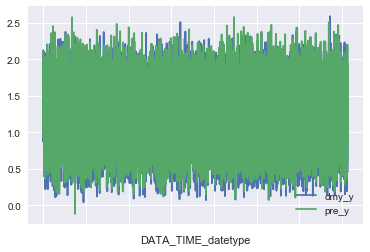

In [9]:
predict_df(sun_train_df,sun_train_x_1,lm_sun)

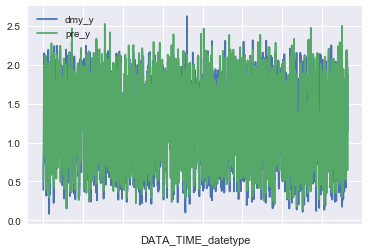

In [10]:
predict_df(sun_test_df,sun_test_x_1,lm_sun)

In [12]:
mse_sun_train = MSE(sun_train_df)
mape_sun_train = MAPE(sun_train_df)
mse_sun_test = MSE(sun_test_df)
mape_sun_test = MAPE(sun_test_df)

In [13]:
lm_no_sun = LinearRegression(fit_intercept= True)
lm_no_sun.fit(no_sun_train_x_1,no_sun_train_y)

#
params_no_sun = pd.Series(lm_no_sun.coef_,index=no_sun_train_x_1.columns)
lm_no_sun.intercept_

no_sun_train_s = lm_no_sun.score(no_sun_train_x_1,no_sun_train_y)
no_sun_test_s = lm_no_sun.score(no_sun_test_x_1,no_sun_test_y)

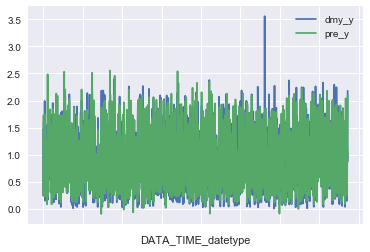

In [14]:
predict_df(no_sun_train_df,no_sun_train_x_1,lm_no_sun)
mse_no_sun_train = MSE(no_sun_train_df)
mape_no_sun_train = MAPE(no_sun_train_df)

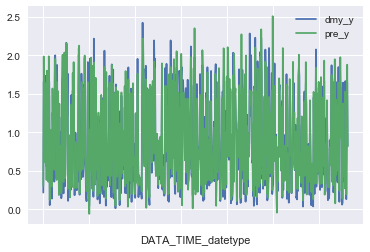

In [15]:
predict_df(no_sun_test_df,no_sun_test_x_1,lm_no_sun)
mse_no_sun_test = MSE(no_sun_test_df)
mape_no_sun_test = MAPE(no_sun_test_df)

In [16]:
from sklearn.linear_model import LinearRegression
lm_total = LinearRegression(fit_intercept= True)
lm_total.fit(total_train_x_1,total_train_y)

total_train_s = lm_total.score(total_train_x_1,total_train_y)
total_test_s = lm_total.score(total_test_x_1,total_test_y)

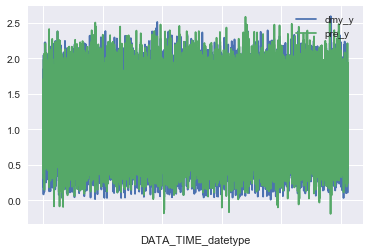

In [17]:
predict_df(total_train_df,total_train_x_1,lm_total)
mse_total_train = MSE(total_train_df)
mape_total_train = MAPE(total_train_df)

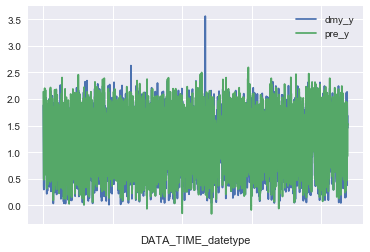

In [18]:
predict_df(total_test_df,total_test_x_1,lm_total)
mse_total_test = MSE(total_test_df)
mape_total_test = MAPE(total_test_df)

In [19]:
print("晴天train準確率： " , sun_train_s)
print("晴天test準確率： " , sun_test_s)
print("非晴天train準確率： " , no_sun_train_s)
print("非晴天test準確率： " , no_sun_test_s)
print("全train準確率： " , total_train_s)
print("全test準確率： " , total_test_s)

晴天train準確率：  0.894798576145
晴天test準確率：  0.889994071533
非晴天train準確率：  0.886345069619
非晴天test準確率：  0.888472212345
全train準確率：  0.899084440273
全test準確率：  0.900070767995


In [20]:
print("晴天train MSE： " , mse_sun_train)
print("晴天train MAPE： " , mape_sun_train)

print("晴天test MSE： " , mse_sun_test)
print("晴天test MAPE： " , mape_sun_test)


print("非晴天train MSE： " , mse_no_sun_train)
print("非晴天train MAPE： " , mape_no_sun_train)

print("非晴天test MSE： " , mse_no_sun_test)
print("非晴天test MAPE： " , mape_no_sun_test)

print("全train MSE： " , mse_total_train)
print("全train MAPE： " , mape_total_train)

print("全test MSE： " , mse_total_test)
print("全test MAPE： " , mape_total_test)

晴天train MSE：  0.03933076634447379
晴天train MAPE：  0.14889781387212836
晴天test MSE：  0.03968780309677111
晴天test MAPE：  0.14605454925869882
非晴天train MSE：  0.04187016996194743
非晴天train MAPE：  0.2924871687452011
非晴天test MSE：  0.040114797764000225
非晴天test MAPE：  0.2839122700676283
全train MSE：  0.041167692991677725
全train MAPE：  0.19910008813834154
全test MSE：  0.03983362131830694
全test MAPE：  0.19661858145111596
